In [1]:
"""
    CS506 Spring 2018 - Homework 1.2
    Probability / Linear Algebra
    author: Nikolakaki Sofia
    ------------------------------------------
"""

'\n    CS506 Spring 2018 - Homework 1.2\n    Probability / Linear Algebra\n    author: Nikolakaki Sofia\n    ------------------------------------------\n'

In this assignment, we will create a gaussian CDF from a probability distribution. 
This assignment is to be completed **INDIVIDUALLY** and is due on **February 10** at **7pm**.

Please update the README file with your BU username. In case you are using the 3-day extension, please mention it in your README file.

The following code produces a probability distribution function. You will assume the PDF called ```distribution``` for the rest of the homework assignment.

In [2]:
"""
Import python packages here.
"""
from scipy import stats 
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

%matplotlib inline

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


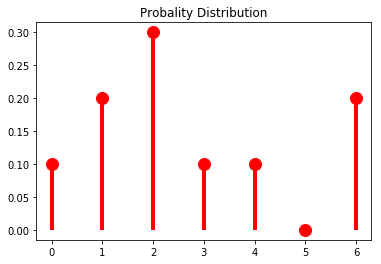

In [3]:
xk = np.arange(7)
pk = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)
distribution = stats.rv_discrete(name='custm', values=(xk, pk))
fig, ax = plt.subplots(1,1)
ax.plot(xk, distribution.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk, 0, distribution.pmf(xk), colors='r', lw=4)
plt.title('Probality Distribution')
plt.show()

a) Generate samples of the intial distribution for the following number of samples i) N = 100, ii) N = 1000. In the same figure, plot the observed probability for each of the two samples, and the actual probability distribution. **(2 pts)**

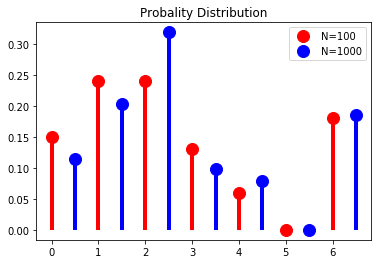

In [4]:
def frequency(a,x):
    count = 0
    for i in a:
        if i == x: 
            count += 1
    return count

a = distribution.rvs(size=100)
f0=frequency(a,0)
f1=frequency(a,1)
f2=frequency(a,2)
f3=frequency(a,3)
f4=frequency(a,4)
f5=frequency(a,5)
f6=frequency(a,6)
#print(f0,f1,f2,f3,f4,f5,f6)
p0=f0/100
p1=f1/100
p2=f2/100
p3=f3/100
p4=f4/100
p5=f5/100
p6=f6/100
#print(p0,p1,p2,p3,p4,p5,p6)
pmf_a=[p0,p1,p2,p3,p4,p5,p6]
#print(pmf_a)
a = distribution.rvs(size=1000)
f0=frequency(a,0)
f1=frequency(a,1)
f2=frequency(a,2)
f3=frequency(a,3)
f4=frequency(a,4)
f5=frequency(a,5)
f6=frequency(a,6)
#print(f0,f1,f2,f3,f4,f5,f6)
p0=f0/1000
p1=f1/1000
p2=f2/1000
p3=f3/1000
p4=f4/1000
p5=f5/1000
p6=f6/1000
#print(p0,p1,p2,p3,p4,p5,p6)
pmf_b=[p0,p1,p2,p3,p4,p5,p6]
#print(pmf_b)

fig, ax = plt.subplots(1,1)
ax.plot(xk, pmf_a, 'ro', ms=12, mec='r',label='N=100')
ax.vlines(xk, 0, pmf_a, colors='r', lw=4)
ax.plot(xk+0.5, pmf_b, 'bo', ms=12, mec='b',label='N=1000')
ax.vlines(xk+0.5, 0, pmf_b, colors='b', lw=4)
plt.legend(loc="best") 
plt.title('Probality Distribution')
plt.show()

b) In this step you will see in practice the Central Limit Theorem by creating a **Gausssian** cumulative distribution function (CDF) from the original probability density function.
In order to do that you need to do the following. Consider the initial probability distribution function, with $X_{i}\in{1,2,3,4,5,6}$ according to the initial probabilities. The sum of the sample set of one random variable is $S_{N} = X_{1} +X_{2} +···+X_{N}$, while N is the size of the sample set of each random variable. You will find many such random variables, and compute the following standardize sum for each of them:

$$ S_{N}^{*} = \frac{S_{N} - N*\mu}{\sqrt{N}}$$

Finally, you will need to create the empirical CDF (a CDF for a discrete random variable) of these standardized means for i)  1 random variable, 2) 10 random variables and 3) 100 random variables. Plot these CDF functions in the same figure.

** (3 pts) **

1000
100 100


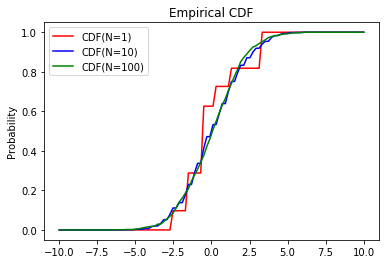

In [7]:
u = 2.7
def CDF(N):
    SNEW=[]
    count=1
    while (count <= 1000):
        X = distribution.rvs(size=N)
        #print(X)
        SN=np.sum(X)
        #print(SN)
        S=(SN-N*u)/np.sqrt(N)
        #print(SNEW)
        SNEW.append(S)
        count += 1
    return SNEW

A = CDF(1)
print(len(A))
x = np.linspace(-10,10,100)
cdfa = sm.distributions.ECDF(A)
ya = cdfa(x)
print(len(x),len(ya))
B = CDF(10)
cdfb = sm.distributions.ECDF(B)
yb = cdfb(x)
C = CDF(100)
cdfc = sm.distributions.ECDF(C)
yc = cdfc(x)
plt.subplot(1,1,1)
plt.plot(x, ya, 'r-', label='CDF(N=1)')
plt.plot(x, yb, 'b-', label='CDF(N=10)')
plt.plot(x, yc, 'g-', label='CDF(N=100)')
plt.legend(loc='best')
plt.ylabel('Probability')
plt.title('Empirical CDF')
plt.show()

Please, report any observations you make. For instance, how do the number of random variables affect the CDF? How do you interpret the steep line of the CDF function, or the range of values it takes? ** (1 pt) **

In [ ]:
'''
As we can see from the graph above, when N=1, the steps are serrated; when N=10, the serrated shape is not that
obvious like N=1 but still there; when N=100, the empirical graph looks very smooth. Based on this phenomenon, I can 
conclude that when N is big enough, the cdf will go very smooth, and the new distribution tends to be a normal distri
-bution, which is symmetrical by x=0. The whole procedure proved Central Limit Theorem.
'''